# Исследование данных о компьютерных играх
В нашем распоряжении исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) интернет-магазина «Стримчик». Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


# Цель исследования
Выполнить предобработку данных и изучить их. Выявить закономерности, которые определяют успешность игры.

Описание данных:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv') # прочитала csv-файл

### Подготовим данные

In [3]:
data.columns = data.columns.str.lower() #привела названия столбцов к нижнему регистру
data.head(5) #проверила

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
display(data.info()) #вывела основную информацию о датафрейме
display(data.isna().sum()) #проверяю в каких столбцах есть пропуски
data.duplicated().sum() #проверяю в каких столбцах есть дубликаты

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

0

Дубликатов нет. Тип данных в year_of_release нужно изменить на int, потому что там указан просто год, он не может быть не целым числом, для начала удалю пропуски, их немного - 269 (из 16446 строк, 269 это 1,64%). В столбцах name и  genre всего по 2 пропуска, я их удалю. 

In [5]:
data = data.dropna(subset=['year_of_release']) #удаляю пропуски в столбце year_of_release
data ['year_of_release'] = data ['year_of_release'].astype(int) #мению тип столбца year_of_release на целочисленный
data.info()
data = data.dropna(subset=['name','genre']) #удаляю пропуски в столбцах
data.isna().sum()#проверяю результат  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [6]:
data['user_score'].unique() #смотрю значения столбца

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В user_score есть значения 'tbd' - To Be Determined, то есть "Будет определено". Это сокращение, что еще не определена точная пользовательская оценка. Значит tbd это пока пропуск, заменю его на nan и в тип float, что бы был такой же тип данных как у столбца critic_score.

In [7]:
data['user_score'] = data['user_score'].replace('tbd','nan') #заменяю tbd на nan
data['user_score'] = data['user_score'].astype(float)# изменила тип данных на вещественный
data.info()#проверяю 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Причиной пропусков данных может быть человеческий фактор - человек не указал сведения или система сбора информации дала сбой, то есть технический сбой. В столбцах - critic_score, user_score и rating очень много пропусков, если заполнить медианным значение или нулем, то будет сильное искажение данных.

**Посчитаем суммарные продажи во всех регионах**


In [8]:
data['sales_sum'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] #суммирую продажи всех регионов
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Суммарные продажи подсчитаны, переходим в исследовательскому анализу данных.

### Проведем исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы, как менялись продажи и важны ли данные за все периоды.**

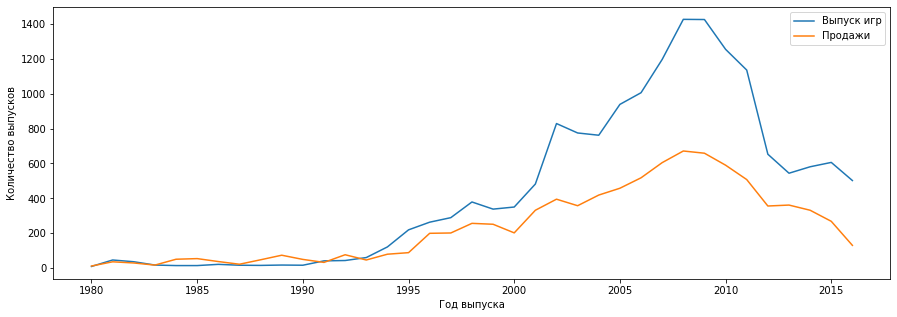

In [9]:
plt.figure(figsize=(15,5))
plt.plot(data.groupby('year_of_release')['name'].count(), label='Выпуск игр')
plt.plot(data.groupby('year_of_release')['sales_sum'].sum(), label='Продажи')
plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпусков')
plt.show()

За разные годы выпускалось разное количество игр, большое количество игр выпускалось с 2007 года по 2009 год по 1400 релизов. За все периоды данные думаю не важны, нужно взять более конкретный период для анализа данных. Продажи соответственно росли в выпуском новых игр, наибольший рост продаж был в период 2004-2009 гг.

**Выберем платформы с наибольшими суммарными продажами**

In [10]:
import seaborn as sns #импорт бибилотеки

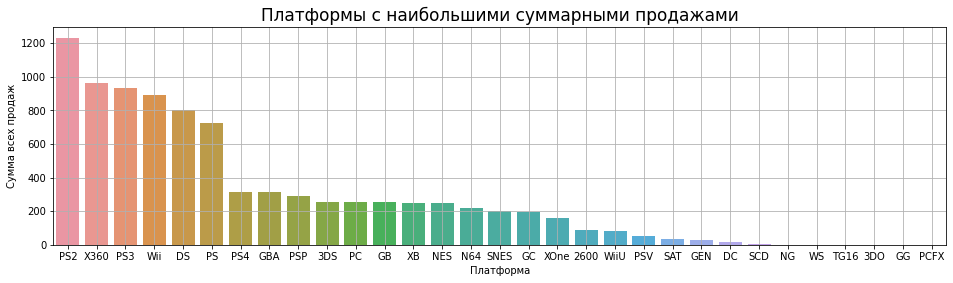

In [11]:
max_sales_platform = data.pivot_table(index='platform', values='sales_sum', aggfunc='sum').sort_values(by='sales_sum', ascending=False) #сводная таблица по платформам и продажам, сортировка по убыванию
plt.figure(figsize=(16, 4))
plt.title('Платформы с наибольшими суммарными продажами', fontsize=17)
sns.barplot(x=max_sales_platform.index, y=max_sales_platform['sales_sum'])
plt.ylabel('Сумма всех продаж')
plt.xlabel('Платформа')
plt.grid(True);

С наибольшими суммарными продажами платформы - PS2(чуть более 1200), X360(почти 1000), PS3(почти 1000), Wii(900), DS(800), PS(700). Далее продажи у платформ ниже 300.

**Посмотрим за какой срок происходит появление и исчезновение платформы**

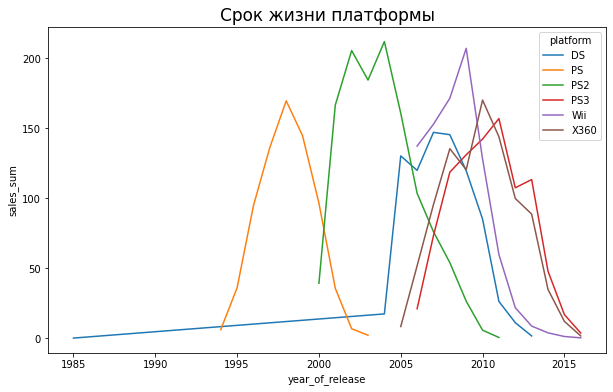

In [12]:
max_sales_platform = data.query("platform == ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']").pivot_table(index=['platform','year_of_release'], values='sales_sum', aggfunc='sum')# Срез по самым прибыльным платформам и сводная таблица
plt.figure(figsize=(10, 6))
plt.title('Срок жизни платформы', fontsize=17)
sns.lineplot(data=max_sales_platform, x="year_of_release", y="sales_sum", hue="platform") #построение лайнплота
sns.set(rc={'figure.figsize':(18,11)}) #увеличение размера
plt.show()

**Вывод** По графику видно, что в среднем каждые 5-10 лет появляются новые и исчезают старые платформы.

Актуальным периодом, чтобы построить прогноз на 2017 год считаю нужно взять предыдущий год - 2016. В данных указана только дата релиза, поэтому я возьму период за 10 лет с 2006 года по 2016.

**Выберем несколько потенциально прибыльных платформ**


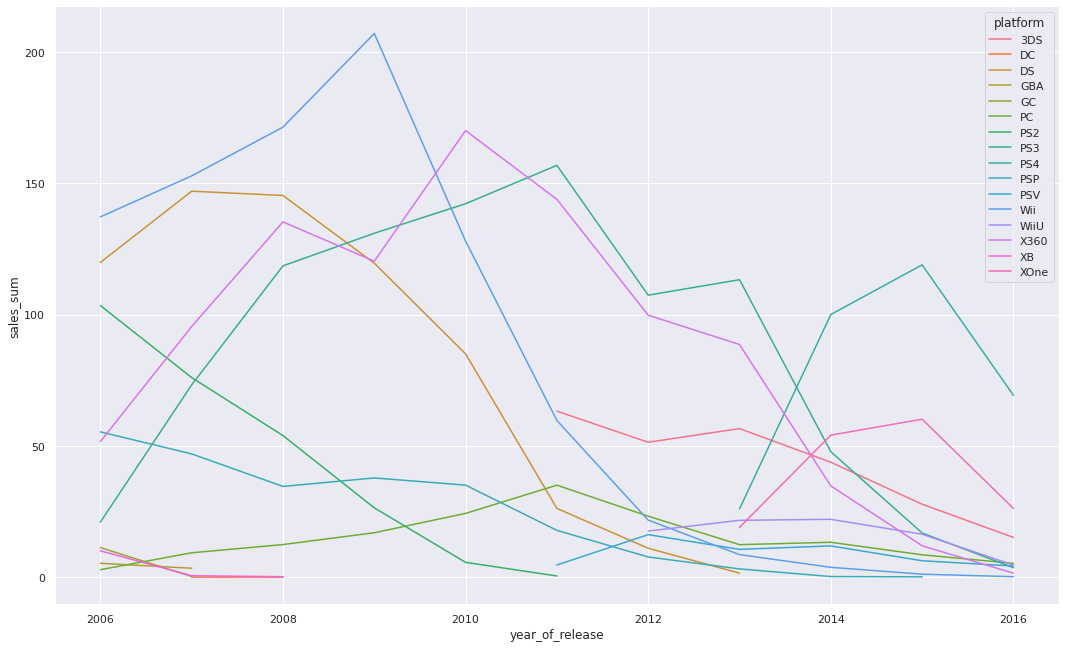

In [13]:
actual_lider_platform = data.query("year_of_release >= 2006")
actual_lider_platform = data.query("year_of_release >= 2006").pivot_table(index=['platform', 'year_of_release'], values='sales_sum', aggfunc='sum') #сводная таблица по платформам и продажам
sns.lineplot(data=actual_lider_platform, x="year_of_release", y="sales_sum", hue="platform") #построение лайнплота
sns.set(rc={'figure.figsize':(18,11)}) #увеличение размера
plt.show()

 **Вывод** Лидируют по продажам платформы - X360, PS2, Wii, DS. У платформы X360, PS3, Wii, DS был хороший рост в период начиная с 2006 года, ближе к 2016 году продажи упали. Только у PS4 и XOne на 2015-2016 год полного спада нет, но линии все равно идут на спад.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

In [14]:
data_act_max_sales = data.query("platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'] and year_of_release > 2006")#срез по нужным платформам и периоду

In [15]:
actual_plat = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'] #список актуальных платформ 
data_actual = data.query('year_of_release > 2006') #срез по году

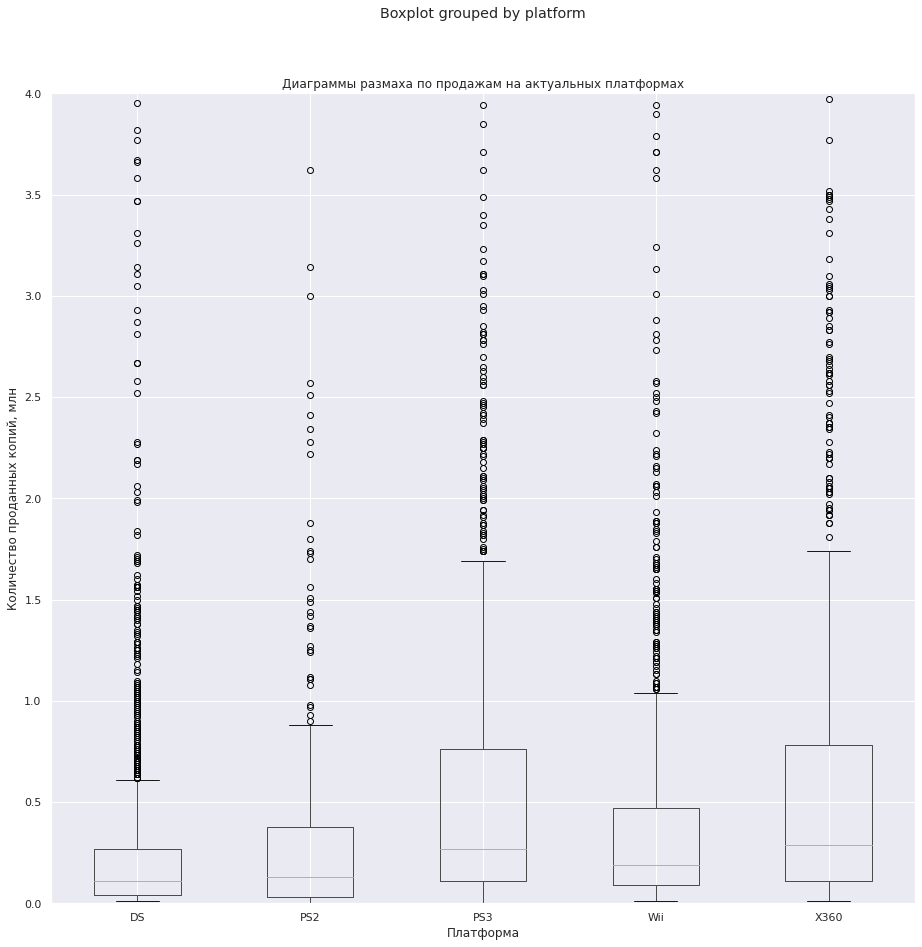

In [16]:
(data_actual.query('platform in @actual_plat')[['platform', 'name', 'sales_sum']]
 .boxplot(column='sales_sum', by='platform', figsize=(15,15))
)
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.ylim(0, 4)
plt.show()

**Вывод** На каждой платформе игрр видно, что есть много выбросов над верхним усом ящика, игры продукт не статичный, не считаю нужным удалять их, выбросы здесь могут иметь большое значение. Медианы у всех на разных уровнях и прибылность тоже у них не одинакова. Те платформы, у которых медианы дальше, приносят больше прибыли - PS3 и X360. У PS2 здесь медиана невысоко, потому что боксплоты строились за период с 2006 года, а эта платформа в 2006 году уже была на спаде по продажам.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


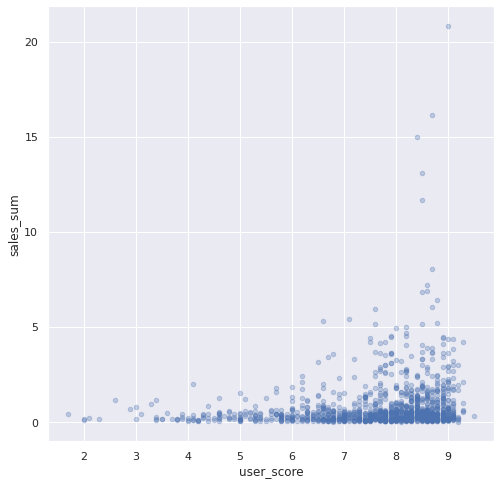

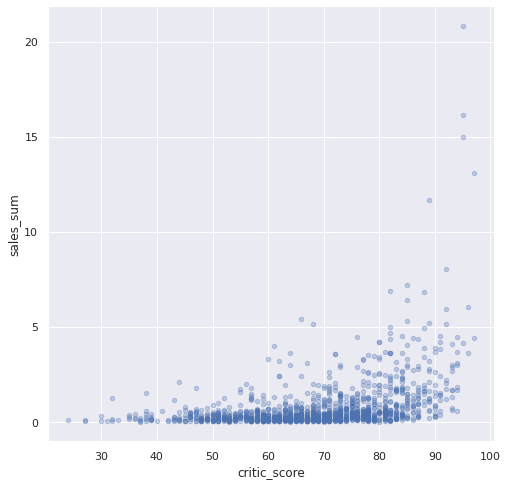

'Корреляция по оценкам пользователей'

0.1750550277038374

'Корреляция по оценкам критиков'

0.39253647544509007

In [17]:
data[data['platform']=='PS2'].plot(x='user_score', y='sales_sum', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
data[data['platform']=='PS2'].plot(x='critic_score', y='sales_sum', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.show()
data_ps2 = data[data['platform']=='PS2']
data_ps2_corr = data_ps2['user_score'].corr(data_ps2['sales_sum'])
display('Корреляция по оценкам пользователей', data_ps2_corr)
data_ps2_corr = data_ps2['critic_score'].corr(data_ps2['sales_sum'])
display('Корреляция по оценкам критиков', data_ps2_corr)

**Вывод** По диаграммам рассеяния видно, что зависимость продаж от отзывов пользователей и по оценкам критиков слабо положительная. Получается, что зависимость продаж от оценок критиков больше, чем от оценок пользователей. Критики имеют больший "вес" и влияние на продажи игр.

**Соотнесем выводы с продажами игр на других платформах.**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


X360
Корреляция между оценкой критиков и продажами: 0.39
Корреляция между оценкой пользователей и продажами: 0.11


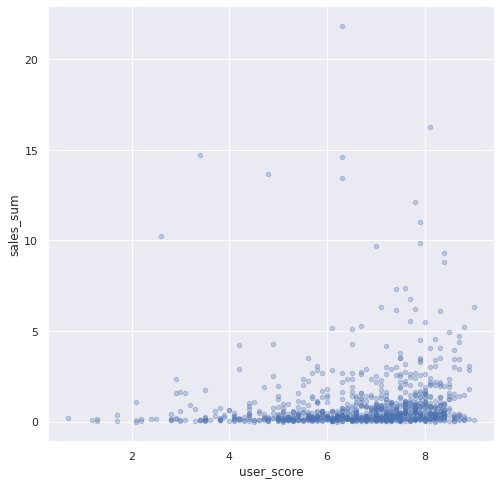

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


------------------------------------------------------------------------------------------------------------------------
PS3
Корреляция между оценкой критиков и продажами: 0.43
Корреляция между оценкой пользователей и продажами: 0.13


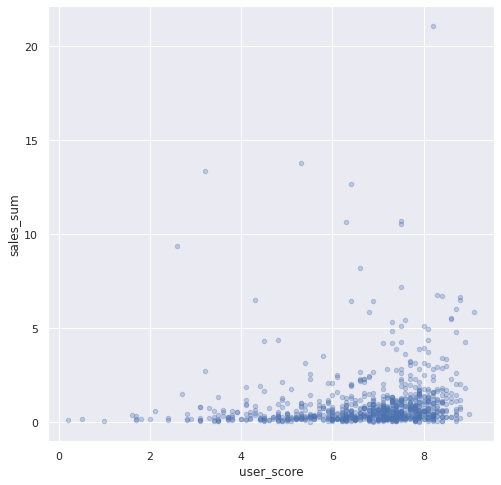

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


------------------------------------------------------------------------------------------------------------------------
Wii
Корреляция между оценкой критиков и продажами: 0.18
Корреляция между оценкой пользователей и продажами: 0.11


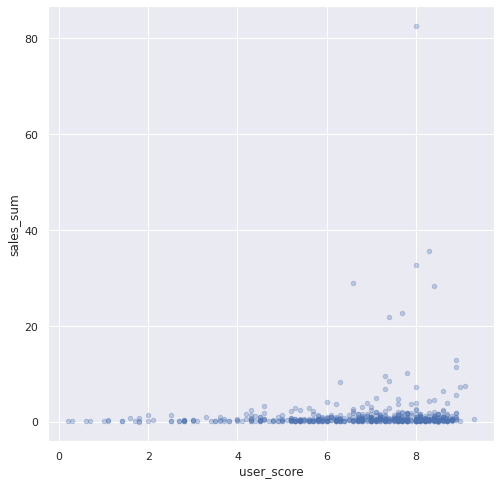

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


------------------------------------------------------------------------------------------------------------------------
DS
Корреляция между оценкой критиков и продажами: 0.24
Корреляция между оценкой пользователей и продажами: 0.13


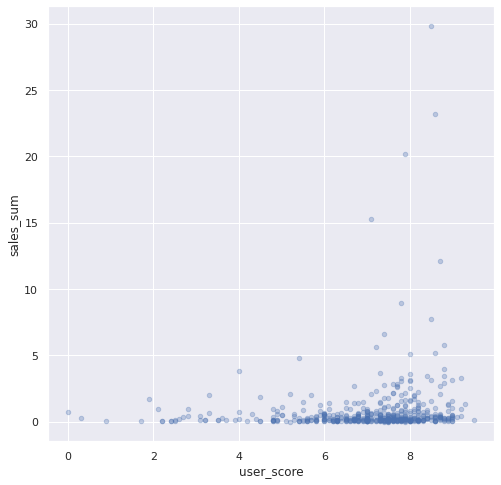

------------------------------------------------------------------------------------------------------------------------
PS
Корреляция между оценкой критиков и продажами: 0.45
Корреляция между оценкой пользователей и продажами: 0.3


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


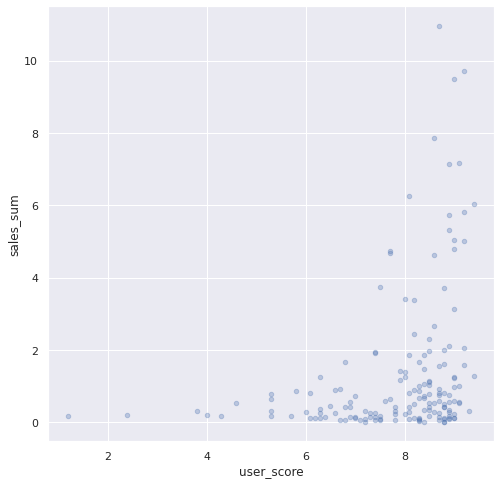

------------------------------------------------------------------------------------------------------------------------


In [20]:
for corr in ['X360', 'PS3', 'Wii', 'DS', 'PS']:# подсчет корреляций и диаграмма рессеиния на других платформах
    print(corr)
    data_corr = data.query('platform == @corr')
    print(f'Корреляция между оценкой критиков и продажами: {data_corr.critic_score.corr(data_corr.sales_sum):.2}')
    print(f'Корреляция между оценкой пользователей и продажами: {data_corr.user_score.corr(data_corr.sales_sum):.2}')
    data_corr.plot(x='user_score', y='sales_sum', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
    plt.show()
    print('--' * 60)    

С остальными платформами такая же картина. Зависимость продаж больше от оценок критиков, нежели от оценок пользователей.

**Распределение игр по жанрам**

genre
Action          3307
Adventure       1293
Fighting         837
Misc            1721
Platform         878
Puzzle           569
Racing          1226
Role-Playing    1481
Shooter         1296
Simulation       857
Sports          2306
Strategy         673
Name: genre, dtype: int64

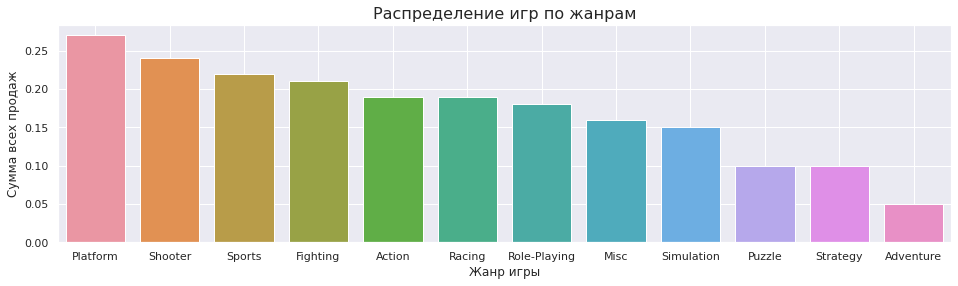

In [22]:
sum_genre = data.groupby('genre')['genre'].count()#группирую по жанру игры
display(sum_genre.head(15))#смотрю каких игр больше всего выпускают
game_genre = data.pivot_table(index='genre', values='sales_sum', aggfunc='median').sort_values(by='sales_sum', ascending=False) #сводная таблица по платформам и продажам, сортировка по убыванию
plt.figure(figsize=(16, 4))
plt.title('Распределение игр по жанрам', fontsize=16)
sns.barplot(x=game_genre.index, y=game_genre['sales_sum'])
plt.ylabel('Сумма всех продаж')
plt.xlabel('Жанр игры')
plt.grid(True);

**Вывод** Стабильно хороший приносят доход игры в жанре Platform, Shooter, Sports, Fighting, Action и Racing.

### Составим портрет пользователя каждого региона

**Самые популярные платформы**

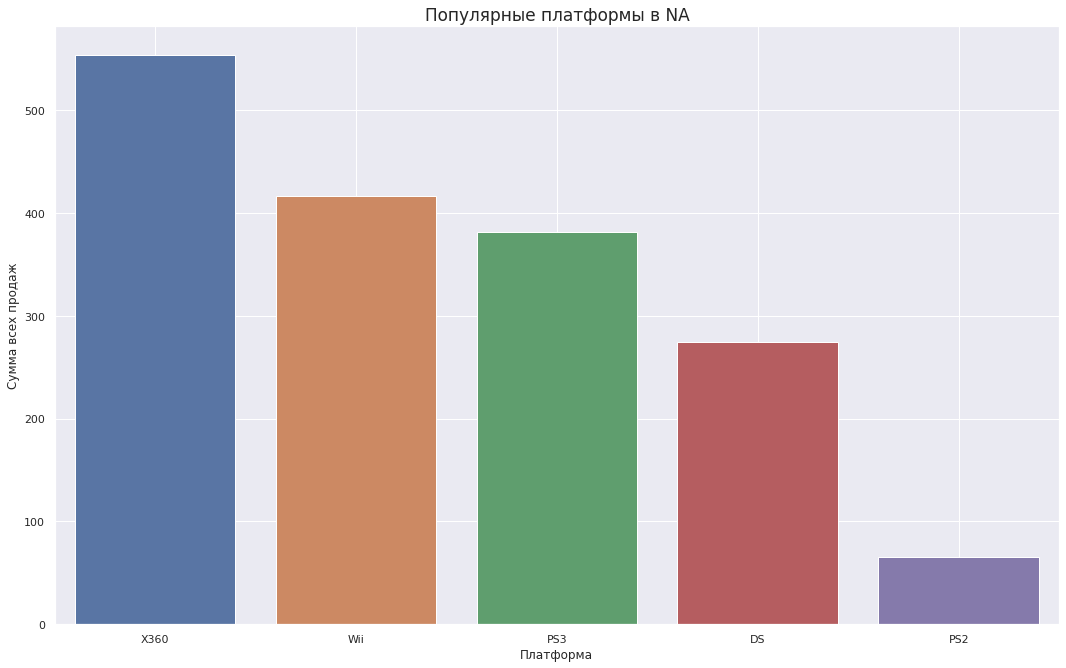

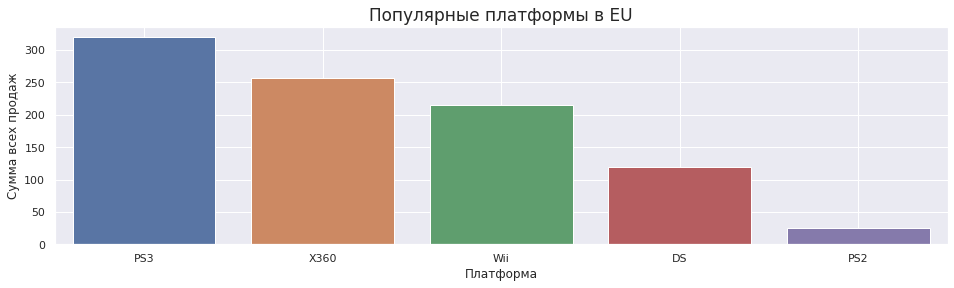

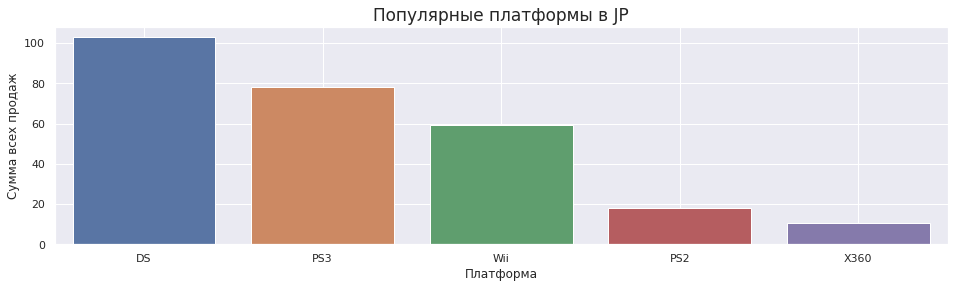

In [24]:
popul_platform_na = data_act_max_sales.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False) #сводная таблица по актуальным платформам с 2006 года
plt.title('Популярные платформы в NA', fontsize=17)
sns.barplot(x=popul_platform_na.index, y=popul_platform_na['na_sales'])
plt.ylabel('Сумма всех продаж')
plt.xlabel('Платформа')
plt.grid(True);

popul_platform_na = data_act_max_sales.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False) 
plt.figure(figsize=(16, 4))
plt.title('Популярные платформы в EU', fontsize=17)
sns.barplot(x=popul_platform_na.index, y=popul_platform_na['eu_sales'])
plt.ylabel('Сумма всех продаж')
plt.xlabel('Платформа')
plt.grid(True);

popul_platform_na = data_act_max_sales.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False) 
plt.figure(figsize=(16, 4))
plt.title('Популярные платформы в JP', fontsize=17)
sns.barplot(x=popul_platform_na.index, y=popul_platform_na['jp_sales'])
plt.ylabel('Сумма всех продаж')
plt.xlabel('Платформа')
plt.grid(True);

Продажи в NA
Х360 - 550 продаж
Wii - 410
PS3 - 390
DS - 280
PS2 - 70

Продажи в EU
PS3 - 310
Х360 - 250 
Wii - 210
DS - 110
PS2 - 25

Продажи в JP
DS - 100
PS3 - 80
Wii - 60
PS2 - 20
Х360 - 10 

**Вывод** Получается, что в каждом регионе свои интересы и предпочтения. Регионы по количеству населения разные. В NA самой популярной платформой является X360, Wii и PS3. В Европе PS3, X360 и Wii те же, что и в NA, но немного в другом порядке. В Японии тоже немного другие приоритеты - DS, PS3 и Wii.

**Самые популярные жанры**

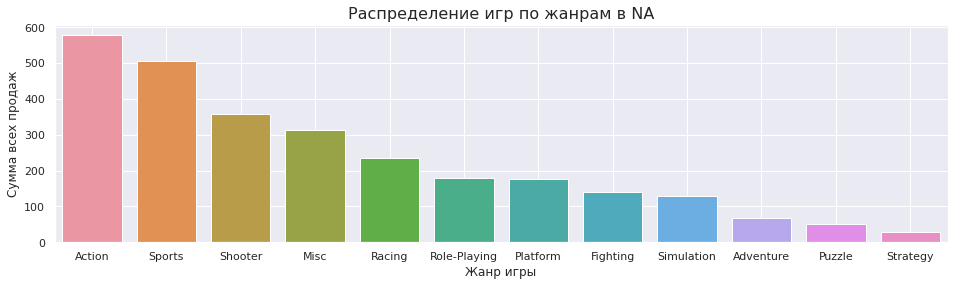

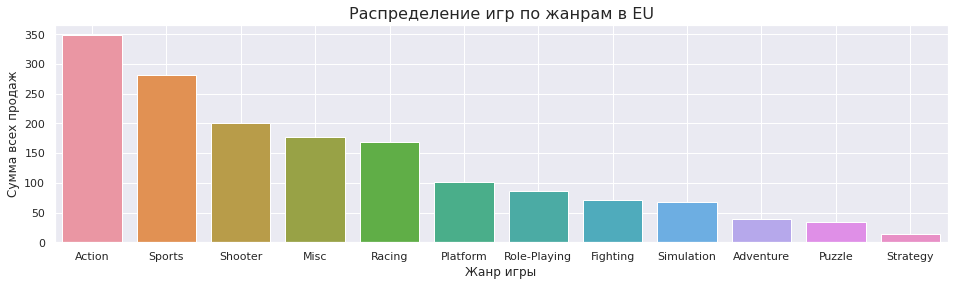

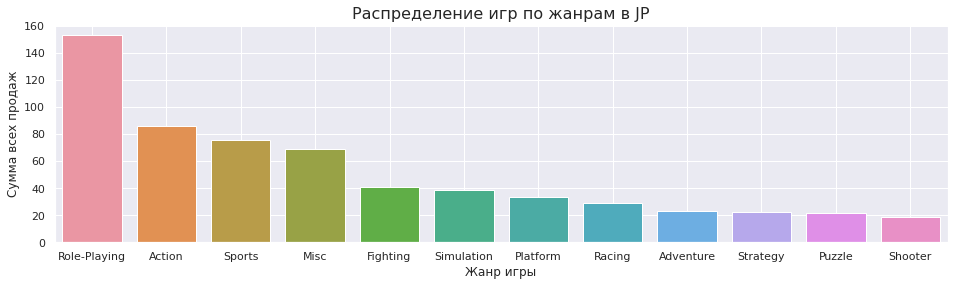

In [25]:
game_genre = data.query("platform == ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']").pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False) #сводная таблица по платформам и продажам, сортировка по убыванию
plt.figure(figsize=(16, 4))
plt.title('Распределение игр по жанрам в NA', fontsize=16)
sns.barplot(x=game_genre.index, y=game_genre['na_sales'])
plt.ylabel('Сумма всех продаж')
plt.xlabel('Жанр игры')
plt.grid(True);

game_genre = data.query("platform == ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']").pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False) #сводная таблица по платформам и продажам, сортировка по убыванию
plt.figure(figsize=(16, 4))
plt.title('Распределение игр по жанрам в EU', fontsize=16)
sns.barplot(x=game_genre.index, y=game_genre['eu_sales'])
plt.ylabel('Сумма всех продаж')
plt.xlabel('Жанр игры')
plt.grid(True);

game_genre = data.query("platform == ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']").pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False) #сводная таблица по платформам и продажам, сортировка по убыванию
plt.figure(figsize=(16, 4))
plt.title('Распределение игр по жанрам в JP', fontsize=16)
sns.barplot(x=game_genre.index, y=game_genre['jp_sales'])
plt.ylabel('Сумма всех продаж')
plt.xlabel('Жанр игры')
plt.grid(True);

**Вывод** В Северной Америке и Европе распределение игр по жанрам одинаковое, скорее всего это связано с тем, что они достаточно недалеко друг от друга находятся и интересы людей с этих территорий схожи. А вот в Японии у людей другие предпочтения в жанрах игр, любят больше всего игры Role-Playing, остальные три жанра как у остальных, вместо Racing играют в игры жанра Fighting.

**Влияние рейтинга ESRB на продажи в отдельном регионе**

In [34]:
data_esrb = data.copy()
display(data_esrb['rating'].unique())
data_esrb['rating'] = data['rating'].fillna('Nan') #заполняю пропуски в столбце
data_esrb['rating'].isna().sum() #Проверяю результат

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

0

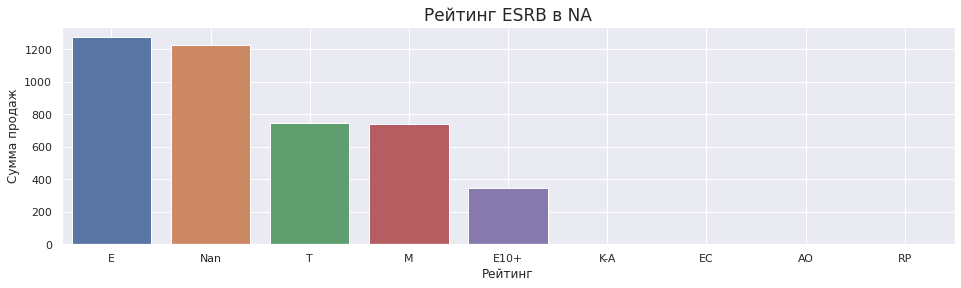

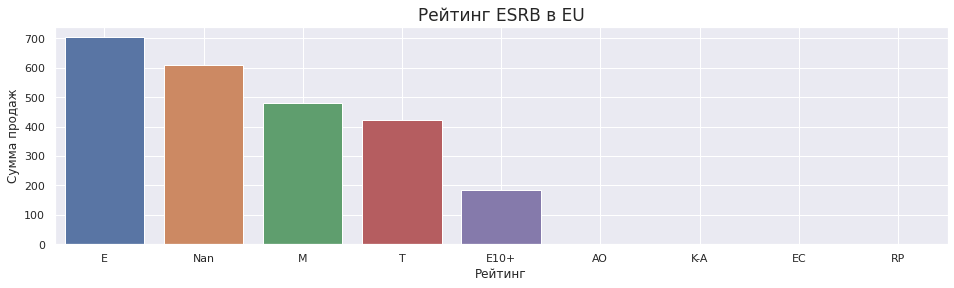

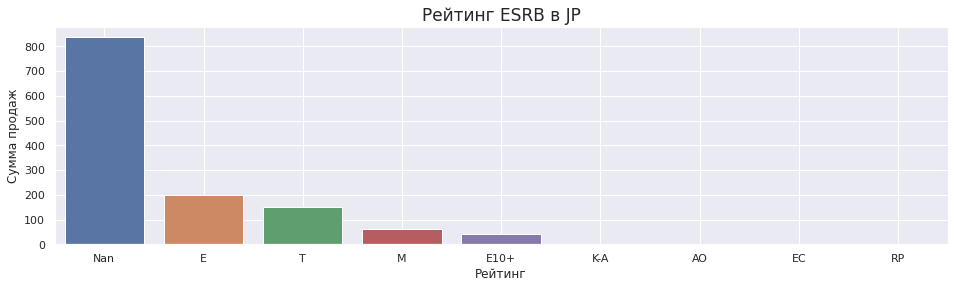

In [36]:
popul_platform_na = data_esrb.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False) #сводная таблица по платформам и продажам, сортировка по убыванию
plt.figure(figsize=(16, 4))
plt.title('Рейтинг ESRB в NA', fontsize=17)
sns.barplot(x=popul_platform_na.index, y=popul_platform_na['na_sales'])
plt.ylabel('Сумма продаж')
plt.xlabel('Рейтинг')
plt.grid(True);

popul_platform_na = data_esrb.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False) #сводная таблица по платформам и продажам, сортировка по убыванию
plt.figure(figsize=(16, 4))
plt.title('Рейтинг ESRB в EU', fontsize=17)
sns.barplot(x=popul_platform_na.index, y=popul_platform_na['eu_sales'])
plt.ylabel('Сумма продаж')
plt.xlabel('Рейтинг')
plt.grid(True);

popul_platform_na = data_esrb.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False) #сводная таблица по платформам и продажам, сортировка по убыванию
plt.figure(figsize=(16, 4))
plt.title('Рейтинг ESRB в JP', fontsize=17)
sns.barplot(x=popul_platform_na.index, y=popul_platform_na['jp_sales'])
plt.ylabel('Сумма продаж')
plt.xlabel('Рейтинг')
plt.grid(True);

**Вывод** В Северной Америке практически одинаково прибыльные игры с рейтингом Е и без рейтинга, по рейтингам Т и М результаты одинаковы, а игры с рейтингом Е10+ в каждом регионе наименее популярны. В Европе практичестки такая же картина по результатам как и в Северной Америке. В Япониии значительно популярнее игры без рейтинга, в 4 раза больше, чем игры с рейтингом Е, которые очень популярны в Америке и Европе.

### Проверим гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Сформулируем гипотезы**
* Нулевая - "Средние рейтинги платформ Xbox One и PC равны".
* Альтернативная - "Средние рейтинги платформ Xbox One и PC различаются".

Нулевая гипотеза формулируется, чтобы был знак равенства, а альтернативная - исходя из нулевой, когла отвергается нулевая, принимается альтернативная.

In [27]:
alpha = 0.05 #уровень статистической значимости
results = st.ttest_ind(
    data[(data.platform == "XOne") & (data.user_score.notna())]['user_score'], #фильтрую пропущенные значения
    data[(data.platform == "PC") & (data.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу


Получается, что средние рейтинги платформ Xbox One и PC различаются.

**Сформулируем гипотезы**
* Нулевая - "Средние пользовательские рейтинги жанров Action и Sports равны".
* Альтернативная - "Средние пользовательские рейтинги жанров Action и Sports разные".

In [28]:
alpha = 0.05 #уровень статистической значимости
results = st.ttest_ind(
    data[(data.genre == "Action") & (data.user_score.notna())]['user_score'], #фильтрую пропущенные значения
    data[(data.genre == "Sports") & (data.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports равны


Для проверки гипотез применила ttest и уровень значимости pvalue, alpha 0.05 потому что это общепринятое пороговое значение.

### Общий вывод

Изучили данные о компьетерных играх, выпущенных с 1980 года по 2016 год. Выявили закономерности определяющие успешность игры.
1. Продажи игр и успешность, соответственно, зависят от оценок критиков больше, чем от оценок пользователей, на это стоит обратить внимание, при планировании компании на 2017 год.

2. Жанр игры тоже влияет на прибыль, самые популярные жанры - Platform, Shooter, Sports, Fighting, Action и Racing, при этом для более точных прогнозов следует обратить внимание на отдельные регионы, т.к. у них предпочтения в жанрах игр немного различаются.

3. В Северной Америке и Европе практически одинаково прибыльные игры с рейтингом Е и без рейтинга, а игры с рейтингом Е10+, в каждом регионе, наименее популярны. В Япониии значительно популярнее игры без рейтинга, значит ESRB рейтинг не оказывает свое влияние на продажи и успешность игры на этой территории.
